Kyle Shannon - 22 NOV 2015 - I decided to use the 2<sup>nd</sup> version dataset [with extra data points and variables] to complete this project.

### Section 0: References 
At End of Document

### Section 1: Statistical Test

#### 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

There is a statistically significant difference in NYC Subway ridership during rainy and non rainy days. To test this hypothesis I will use a Mann-Whitney two-tailed U-test at a 95% confidence level, &alpha; = 0.05. Formally:

-  H<sub>0</sub>: P(x > y) = 0.5
-  H<sub>1</sub>: P(x > y) &#8800; 0.5


Day | &mu; | Refers to 
--- | ---
nonRainy | 1845.539 | Data from Figure 1
Rainy | 2028.196 | Data from Figure 2

<img src="Figure 1.png" alt="inline" style="width: 400px; float:left;"/><img src="Figure 2.png" alt="inline" style="width: 380px; float:left;"/>

<img src="Figure 3.png" alt="inline" style="width: 400px; float:left;"/><img src="Figure 4.png" alt="inline" style="width: 380px; float:left;"/>

A log transform to normalize heavily right skewed data is an acceptable approach. However, this data set has many zero values. There is a great StackExchange post by Rob Hyndman on dealing with log transforms where zero values are present. At the moment I choose not to go further with the transform and to do it at a later date.

#### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

The Mann-Whitney U test is being used because it does not assume an underlying distribution, unlike the t-test's assumption that the data is normally sitributed. The histograms in Figure 1 and 2 clearly shw that the data is not normally distributed, but that it is heavily right taled skewed. Therefore, we will use the U test. 

#### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

- nonRainy &mu; = 1845.539
- Rainy &mu; = 2028.196
- Mann-Whitney Test Statistic:  153635120.5
- p value:  5.48213914249e-06

#### 1.4 What is the significance and interpretation of these results?

With a p-value < the &alpha; = 0.05 we have evidence to reject the null hypothesis in favor of the alternative. In other words we conclude with 95% confidence that the difference in distributions is not due to random sampling, rather the sample sets come from two distinct populations. 


### Section 2: Linear Regression

#### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:

I used OLS Linear Regression to compute the &beta; coefficients. I used StatsModels to explore using different features. I largely did this because of how easy it is to get t-statistics, p-values and AIC from the regression_results.summary() method. 


#### 2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?
#### 2.3 Why did you select these features in your model?
#### 2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

Table of features:

Feature | &beta;--coefficient| Rationale 
--- | ---
precipi | -1901.9935  | Precipitation is better than using rain because unlike rain it is not boolean value. Furthermore, precipi takes into account location and hour making it much more granular. Rain is a bool value and is true so long as it rained at some point during the day at the unti location. I.e. even if it rained for only an hour. 
meanwspdi | 3.9864 | Mean windspeed is slightly less correlated with percipitation than windspeed. I expect weather features to be more highly correlated, so I choose the mean windspeed, because I expect the level of wind speed to have an effect on people i.e. walking/biking outside to a destination vs. taking the subway.
meantempi | -15.7364 | I expect more people to take the subway when it is cold outside and less people to take it when it is hot and no one wants to find out if the subway's car A/C is working or not...
unit | dummy_feature | Transformed into a df of dummy variables size unit-1. Because there is a difference in value.counts() for units (e.g. grand central station vs end of the line station this is an essential predictor for ridership. In other words units in downtown are expected to have a higher ridership value than a stop in the suburbs.
hour | dummy_feature |Ridership certainly will vary based on hour of the day. For example peak rush hour vs. midnight. I choose to make this a dummy variable because like day_week keeping the data as is would result in it being interpreted as ordinal data, which it is not. However, there is a downside to using dummies for hour. Dummies do not take into account the time series foundation of data. The dummies may also be overfitting the data due to its granular effect, i.e. more coefficients. Using for example a polynomial approach would lessen the coefficients and possibly produce a better model.
day_week | dummy_feature | day_week seemed better than the boolean feature weekday. However, I made day_week a dummy variable because there is no hierarchical ordering to weekdays, day 6 is not more important than day 3. I should normalize the data though because of the monday holiday in the data set. This can be seen in the confidence intervals. The table below shows a dip in day 0, Monday. This is due to the holiday. However the coefficients are negative for the weekends, this shows how ridership goes down during the weekend compared to the work week. 


Variable | Coefficient | std err | t | P>[t] | [95.0% Conf. Int.]
--- | --- | --- | --- | --- | ---| ---
dummy_day_week_0 | 245.6075	| 26.529 | 9.258 | 0.000 | 193.610 297.605
dummy_day_week_1 | 681.7857	| 29.714 | 22.945 | 0.000 | 623.546 740.026
dummy_day_week_2 | 675.6276	| 27.690 | 24.400 | 0.000 | 621.355 729.900
dummy_day_week_3 | 683.8690	| 27.736 | 24.656 | 0.000 | 629.505 738.233
dummy_day_week_4 | 657.7155	| 26.849 | 24.497 | 0.000 | 605.092 710.339
dummy_day_week_5 | -231.9556 | 27.710 | -8.371 | 0.000 | -286.268 -177.643
dummy_day_week_6 | -588.3065 | 24.466 | -24.046 | 0.000	| -636.261 -540.352

#### 2.5 What is your model’s R<sup>2</sup> (coefficients of determination) value?

0.54536

#### 2.6 What does this R<sup>2</sup> value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R<sup>2</sup> value?

This model's goodness of fit is alright. ~54% of the variability has been explained by the model. Models predicting human behavior might not have a high R<sup>2</sup> because of the variability in human behavior. Also a high R<sup>2</sup> value does not necessarily mean a good model, nor does a low value mean a bad model. In order to gain more insight into how good a model is we can plot the residuals, look at the F-statistics and its corresponding p-value as well as apply domain knowledge to the model's intended use.

Another model would definitely perform better. For example random forest or timeseries/location (longitudinal) models. The reason being that simple OLS regression may be too simple of a model to predict something as complex as human NYC subway ridership behavior. Also the data we are feeding into the model is not linear. This poses another issue. Below is a plot of the residuals. The plot does not look to be very well normally distributed about 0. There seems to be a leftward shift.




<img src="Figure 7.png" alt="inline" style="width: 400px;float:left;"/>
<img src="Figure 8.png" alt="inline" style="width: 400px;float:left;"/>

Figure 8 is a scatter plot showing predictions by residuals. There is a great amount of heteroscedasticity, as shown by the fanning pattern. The variability increases with predictions and we see a hard bottom line, due to the initial right handed skewness of the data. One potential fix for data that exhibits heteroscedasticity is to perform a transform of the data. i.e. log transform.

### Section 3: Visualization

#### 3.1 One visualization should contain two histograms: one of ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.

Please reference Figure 1-4 above.

#### 3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. 

Table 1. Sum of Total Riders by Hour for May

Hour | Sum of Counts
--- | ---
0 - Midnight  |  10,353,167.00
4  |  2,300,788.00
8  |  5,198,583.00
12  |  22,085,316.00
16  |  16,833,040.00
20 - 8:00 PM  |  23,690,281.00

Table 2. Sum of Total Riders by Day for May


Day | Sum of Counts | Average of Counts
--- | --- | ---
Day 0 - Monday\* |  12,795,107.00  |  1825.26490728
Day 1  |  15,246,943.00  |  2164.83643334
Day 2  |  12,592,691.00  |  2297.09795695
Day 3  |  12,709,142.00  |  2317.07237922
Day 4  |  12,411,679.00  |  2277.37229358
Day 5  |  7,486,907.00  |  1383.90147874
Day 6 - Sunday  |  7,218,706.00  |  1066.43610578

\*Decrease for Monday likely due to Holiday, Memorial Day




<img src="Figure 5new.png" alt="inline" style="width: 900px;">

Scatter plots of the non dummy features I choose to use in the model.

<img src="Figure 6.png" alt="inline" style="width: 800px;">

Figure 6 provides a good correlation overview for the NYC subway data set. Another reason I did not choose to include for example both *tempi* and *meantmpi* is that they are highly correlated. Putting highly correlated features into a linear regression model can contribute collinearity. 

### Section 4: Conclusion

#### 4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?

More people will ride the subway when it is raining outside during the month of May.

#### 4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.

The mean for ridership was higher during days of rain vs non rain. The U-test verified (95% with a p-value < 0.05) that the distributions were different. Therefore, it appears that when it rains in NYC during May, more people on average choose to ride the Subway. 

From the model, it looks like as average temperature increases ridership goes down. This makes sense as being in the subway with no A/C in 95<sup>0</sup> is no fun. Also when it is raining it tends to be colder outside. 

Finally, both my model's AIC and BIC values are through the roof. Perhaps this is due to the number of parameters I have, about 257) I believe AIC and BIC penalize the model for having a large number of parameters. 

### Section 5: Reflection

#### 5.1 Please discuss potential shortcomings of the methods of your analysis, including:

The dataset has several issues. There is only data available for May. It is tough to build a model to predict ridership with data for only one month, especially when the data you are primarily using is weather data. In May, there is a holiday that falls on Monday. I believe should normalize the data for this feature. I may come back and do this another day.  

Linear regression is probably not the best model to use. A model that deals better with time series and locations would be better. 

One issue I see is that the model has such a high conditional number: 1.5339860506628557e+17, I believe this refers to an issue with multicollinearity. Perhaps I have too many dummy variables. If the dummy variables are the issue then this data set may force a high conditional number. UNIT creates a lot of dummies, but it is also an absolutely essential feature to include. Perhaps there is an issue with the intercept? I am not sure.

It appears that using weather data to predict NYC subway ridership is subpar. Weather does not seem to really impact people's mode of transportation. Sure there may be a slight uptick in ridership overall during rainy days. But trying to predict ridership using this data does not do justice to the complex nature of NYC subway ridership. 

One other major issue is the coefficient for precipi I calculated. Currently it is: -1901.9935. This says that for every unit increment in rain, ridership would decrease by the value of ~ -1901. However this contradicts our findings that ridership shows a slight uptick during days with rain. Having highly correlated features can be a cause of this. In my first correlation matrix I did not find any of the features I was going to use highly correlated. However, many (~250) dummy variables were added to the model. This could be the cause of the multicollinearity.   

#### 5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?

I have nothing else to add.

### Section 0: References

- I used documentation from Seaborn, Pandas, Numpy, Statsmodels and Scikit Learn.
- http://stats.stackexchange.com/questions/9171/aic-or-p-value-which-one-to-choose-for-model-selection
- https://en.wikipedia.org/wiki/Akaike_information_criterion
- http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/
- http://robjhyndman.com/hyndsight/transformations/
- http://stats.stackexchange.com/questions/1444/how-should-i-transform-non-negative-data-including-zeros
- Introduction Statistical Learning by Hastie et al.


### Relevant Code:

In [2]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import sklearn
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import formatter
import math
import statsmodels.formula.api as smf
%matplotlib inline



In [3]:
df = pd.read_csv('turnstile_weather_v2.csv') #import csv into pandas.dataframe

In [4]:
df.info() #gathering general info about data, including counts, dtypes(), nulls, and col names

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42649 entries, 0 to 42648
Data columns (total 27 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

In [5]:
df.describe() #gathering general statistical info about data

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [6]:
print df['rain'].value_counts() #using value_counts to glean more info about particular columns of data.

0    33064
1     9585
Name: rain, dtype: int64


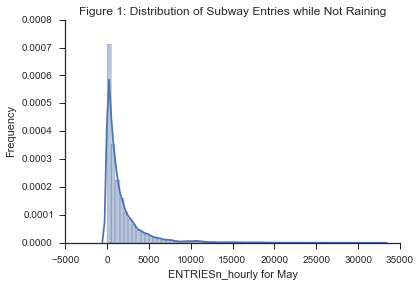

In [7]:
#Figure 1
sns.set_style("ticks")
figure_1 = sns.distplot(df['ENTRIESn_hourly'][df['rain']==0], bins=range(0,30001,500))
figure_1.set(ylabel="Frequency", xlabel='ENTRIESn_hourly for May', yticks=np.arange(0.0000,0.0009,0.0001), 
             title="Figure 1: Distribution of Subway Entries while Not Raining")
sns.despine()
plt.show()

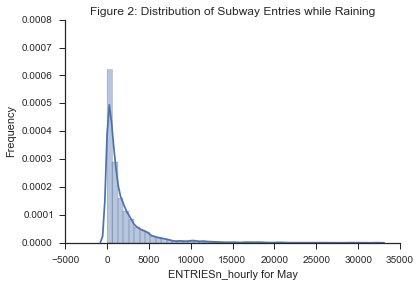

In [8]:
#Figure 2
sns.set_style("ticks")
figure_2 = sns.distplot(df['ENTRIESn_hourly'][df['rain']==1])
figure_2.set(ylabel="Frequency", xlabel='ENTRIESn_hourly for May', yticks=np.arange(0.0000,0.0009,0.0001),
             title="Figure 2: Distribution of Subway Entries while Raining")
sns.despine()
plt.show()

In [9]:
print 'Non Rainy Days: '
print df['ENTRIESn_hourly'][df['rain']==0].describe()

Non Rainy Days: 
count    33064.000000
mean      1845.539439
std       2878.770848
min          0.000000
25%        269.000000
50%        893.000000
75%       2197.000000
max      32814.000000
Name: ENTRIESn_hourly, dtype: float64


In [10]:
print 'Rainy Days: '
print df['ENTRIESn_hourly'][df['rain']==1].describe()

Rainy Days: 
count     9585.000000
mean      2028.196035
std       3189.433373
min          0.000000
25%        295.000000
50%        939.000000
75%       2424.000000
max      32289.000000
Name: ENTRIESn_hourly, dtype: float64


In [11]:
#MannWhitney U test comparing distributions for ENTRIESn_hourly by rain/no rain
non_rainy = df['ENTRIESn_hourly'][df['rain']==0]
rainy = df['ENTRIESn_hourly'][df['rain']==1]
statistic, pvalue = scipy.stats.mannwhitneyu(non_rainy, rainy)
print 'Test Statistic: ', statistic
print 'p-value: ', pvalue*2 #pvalue*2 for 2 sided test

Test Statistic:  153635120.5
p-value:  5.48213914249e-06


In [12]:
#Shapiro test not good for large sample size. Perhaps we can randomly sub sample and rerun, or use the darling test?
scipy.stats.shapiro(df['ENTRIESn_hourly'][df['rain']==1])

/Applications/anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:1082: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.5938820838928223, 0.0)

In [13]:
df['ENTRIESn_hourly_logtran'] = df['ENTRIESn_hourly']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42649 entries, 0 to 42648
Data columns (total 28 columns):
UNIT                       42649 non-null object
DATEn                      42649 non-null object
TIMEn                      42649 non-null object
ENTRIESn                   42649 non-null int64
EXITSn                     42649 non-null int64
ENTRIESn_hourly            42649 non-null float64
EXITSn_hourly              42649 non-null float64
datetime                   42649 non-null object
hour                       42649 non-null int64
day_week                   42649 non-null int64
weekday                    42649 non-null int64
station                    42649 non-null object
latitude                   42649 non-null float64
longitude                  42649 non-null float64
conds                      42649 non-null object
fog                        42649 non-null int64
precipi                    42649 non-null float64
pressurei                  42649 non-null float64
rain     

In [15]:
#log transform ENTRIESn_hourly data due to heavy right handed skewness.
df['ENTRIESn_hourly_logtran'] = np.log(df['ENTRIESn_hourly_logtran'])

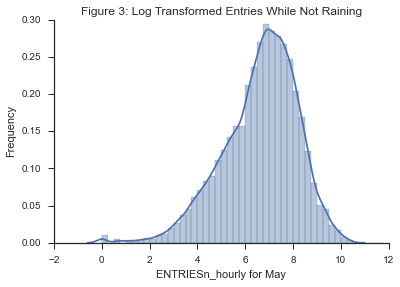

In [16]:
sns.set_style("ticks")
figure_1 = sns.distplot(df['ENTRIESn_hourly_logtran'][df['rain']==0], bins=np.arange(0,12,.25))
figure_1.set(ylabel="Frequency", xlabel='ENTRIESn_hourly for May', title="Figure 3: Log Transformed Entries While Not Raining")
sns.despine()
plt.show()

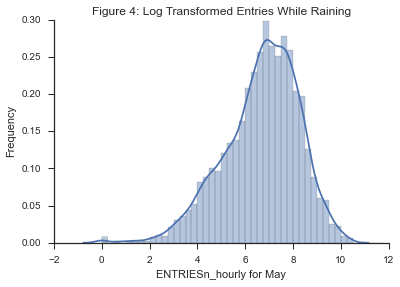

In [17]:
sns.set_style("ticks")
figure_1 = sns.distplot(df['ENTRIESn_hourly_logtran'][df['rain']==1], bins=np.arange(0,12,.25))
figure_1.set(ylabel="Frequency", xlabel='ENTRIESn_hourly for May', title="Figure 4: Log Transformed Entries While Raining")
sns.despine()
plt.show()

In [18]:
scipy.stats.mannwhitneyu(df['ENTRIESn_hourly_logtran'][df['rain']==0],df['ENTRIESn_hourly_logtran'][df['rain']==1])

MannwhitneyuResult(statistic=153635120.5, pvalue=2.7410695712437496e-06)

In [19]:
df['ENTRIESn_hourly_logtran'].describe()

count    4.264900e+04
mean             -inf
std               NaN
min              -inf
25%      5.613128e+00
50%      6.807935e+00
75%      7.720905e+00
max      1.039861e+01
Name: ENTRIESn_hourly_logtran, dtype: float64

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


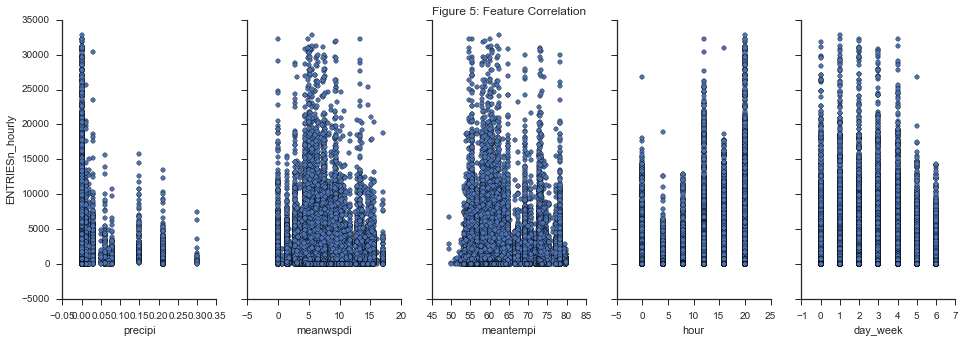

In [20]:
fig, axs = plt.subplots(1, 5, sharey=True)

df.plot(kind='scatter', x='precipi', y='ENTRIESn_hourly', ax=axs[0],  figsize=(16, 5))
df.plot(kind='scatter', x='meanwspdi', y='ENTRIESn_hourly', ax=axs[1])
df.plot(kind='scatter', x='meantempi', y='ENTRIESn_hourly', ax=axs[2], title='Figure 5: Feature Correlation')
df.plot(kind='scatter', x='hour', y='ENTRIESn_hourly', ax=axs[3])
df.plot(kind='scatter', x='day_week', y='ENTRIESn_hourly', ax=axs[4])
sns.despine()

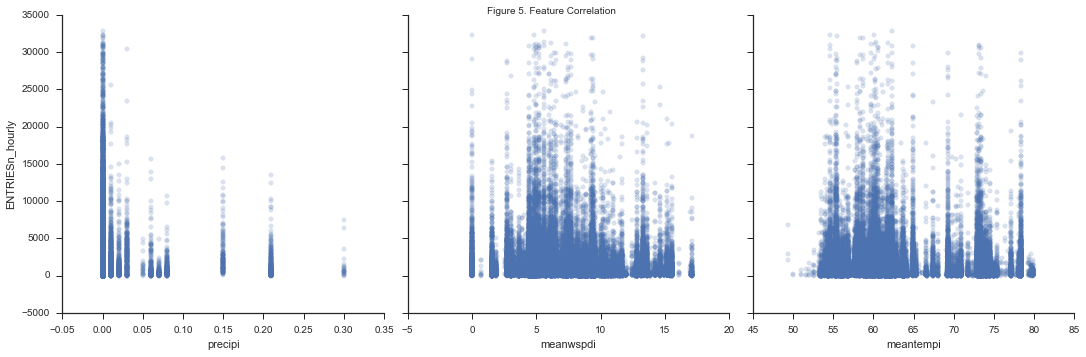

In [22]:
pair_plot_data = ['ENTRIESn_hourly','precipi','meanwspdi','meantempi']
pair_plot = sns.PairGrid(df[pair_plot_data], size=5,
                         y_vars=['ENTRIESn_hourly'],
                         x_vars=['precipi','meanwspdi','meantempi'])
pair_plot = pair_plot.map(plt.scatter, alpha=0.20, s=20)
pair_plot = pair_plot.fig.suptitle('Figure 5. Feature Correlation')


/Applications/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Applications/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


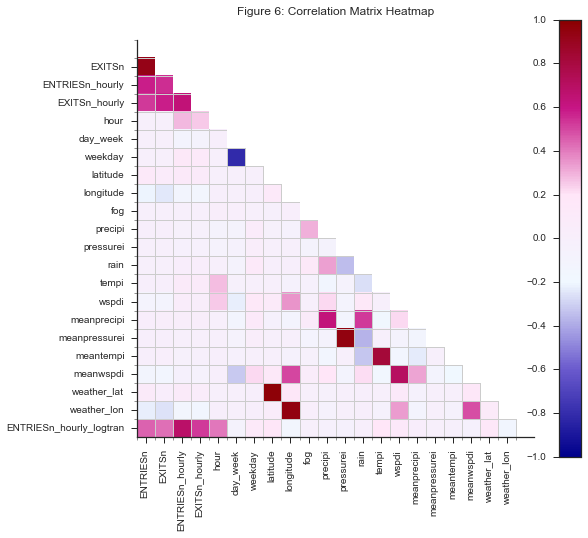

In [23]:
# Creating corr heatmap to look at overall feature correlation. This helps me look for potential multicolinearity issues.
data = df
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.blend_palette(["#00008B", "#6A5ACD", "#F0F8FF",
                          "#FFE6F8", "#C71585", "#8B0000"], as_cmap=True)
sns.corrplot(data, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
sns.plt.title('Figure 6: Correlation Matrix Heatmap')
f.tight_layout()
sns.despine()

In [70]:
def counts_by_hour(dataframe):
    hour = 0
    for num in range(0,6):
        print "Hour", hour, " | ", "{:0,.2f}".format(df['ENTRIESn_hourly'][df['hour']==hour].sum())
        hour += 4
counts_by_hour(df)

def counts_by_day_week(dataframe):
    day_week = 0
    count = 0
    for num in range(0,7):
        print "Day", day_week, " | ", "{:0,.2f}".format(df['ENTRIESn_hourly'][df['day_week']==day_week].sum()), " | ", df['ENTRIESn_hourly'][df['day_week']==count].sum()/df['day_week'].value_counts()[count] 
        day_week += 1
        count += 1
counts_by_day_week(df)

Hour 0  |  10,353,167.00
Hour 4  |  2,300,788.00
Hour 8  |  5,198,583.00
Hour 12  |  22,085,316.00
Hour 16  |  16,833,040.00
Hour 20  |  23,690,281.00
Day 0  |  12,795,107.00  |  1825.26490728
Day 1  |  15,246,943.00  |  2164.83643334
Day 2  |  12,592,691.00  |  2297.09795695
Day 3  |  12,709,142.00  |  2317.07237922
Day 4  |  12,411,679.00  |  2277.37229358
Day 5  |  7,486,907.00  |  1383.90147874
Day 6  |  7,218,706.00  |  1066.43610578


In [24]:
# Add UNIT to features using dummy variables
dummy_units_unit = pd.get_dummies(df['UNIT'], prefix='dummy_unit')
dummy_units_day_week = pd.get_dummies(df['day_week'], prefix='dummy_day_week')
dummy_units_hour = pd.get_dummies(df['hour'], prefix='dummy_hour')
# create X and y
feature_cols = ['precipi','meanwspdi', 'meantempi']

X = df[feature_cols]
X = X.join(dummy_units_unit)
X = X.join(dummy_units_day_week)
X = X.join(dummy_units_hour)

#print X

y = df.ENTRIESn_hourly

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

-7.12488014521e+14
[ -1.90454563e+03   4.12802942e+00  -1.57308640e+01  -3.51226534e+11
  -3.51226533e+11  -3.51226533e+11  -3.51226533e+11  -3.51226534e+11
  -3.51226534e+11  -3.51226534e+11  -3.51226527e+11  -3.51226525e+11
  -3.51226531e+11  -3.51226533e+11  -3.51226530e+11  -3.51226526e+11
  -3.51226531e+11  -3.51226527e+11  -3.51226529e+11  -3.51226524e+11
  -3.51226528e+11  -3.51226531e+11  -3.51226529e+11  -3.51226531e+11
  -3.51226527e+11  -3.51226531e+11  -3.51226529e+11  -3.51226529e+11
  -3.51226526e+11  -3.51226533e+11  -3.51226531e+11  -3.51226533e+11
  -3.51226533e+11  -3.51226534e+11  -3.51226533e+11  -3.51226533e+11
  -3.51226531e+11  -3.51226533e+11  -3.51226531e+11  -3.51226529e+11
  -3.51226525e+11  -3.51226531e+11  -3.51226530e+11  -3.51226529e+11
  -3.51226533e+11  -3.51226531e+11  -3.51226532e+11  -3.51226526e+11
  -3.51226532e+11  -3.51226529e+11  -3.51226533e+11  -3.51226533e+11
  -3.51226533e+11  -3.51226533e+11  -3.51226531e+11  -3.51226533e+11
  -3.51226533e+

In [25]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

[('precipi', -1904.5456335923689),
 ('meanwspdi', 4.1280294245868916),
 ('meantempi', -15.73086396928319)]

In [26]:
# calculate the R-squared
lm.score(X, y)

0.54536102607854087

In [27]:
# Add UNIT, day_week and hour to features using dummy variables
dummy_units_unit = pd.get_dummies(df['UNIT'], prefix='dummy_unit')
dummy_units_day_week = pd.get_dummies(df['day_week'], prefix='dummy_day_week')
dummy_units_hour = pd.get_dummies(df['hour'], prefix='dummy_hour')

# Creating non dummy cols to be taken from data frame
feature_cols = ['precipi','meanwspdi', 'meantempi']

# Joining Dummy variables to model inpit data
X = df[feature_cols]
X = X.join(dummy_units_unit)
X = X.join(dummy_units_day_week)
X = X.join(dummy_units_hour)

# Setting features = X so i can use features in residual plot. I do not want the constant column 
# in there as I will add the intercept outside of the np.dot method.
features = X

# Setting up y value and adding constant to model
y = df.ENTRIESn_hourly
X = sm.add_constant(X)

#fitting model and obtaining predicted results
model = sm.OLS(y,X)
results = model.fit()

In [28]:
#Making sure Constant column was added as well as looking at model input data.
print X.head()

   const  precipi  meanwspdi  meantempi  dummy_unit_R003  dummy_unit_R004  \
0      1        0       7.86      55.98                1                0   
1      1        0       7.86      55.98                1                0   
2      1        0       7.86      55.98                1                0   
3      1        0       7.86      55.98                1                0   
4      1        0       7.86      55.98                1                0   

   dummy_unit_R005  dummy_unit_R006  dummy_unit_R007  dummy_unit_R008  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

       ...        dummy_day_week_3  dummy_day_week_4  dummy_day_week_5  \
0      ...              

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     201.0
Date:                Mon, 07 Dec 2015   Prob (F-statistic):               0.00
Time:                        20:36:37   Log-Likelihood:            -3.8449e+05
No. Observations:               42649   AIC:                         7.695e+05
Df Residuals:                   42395   BIC:                         7.717e+05
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const             2124.3433     80.612     26.353      0.000      1966.343  2282.344
precipi          -1901.9935    407.573     -4.667      0.000     -2700.845 -1103.142
meanwspdi            3.9864      4.687      0.851      0.395        -5.200    13.173
meantempi          -15.7364      1.486    -10.588      0.000       -18.650   -12.823
dummy_unit_R003  -1703.9417    154.156    -11.053      0.000     -2006.090 -1401.793
dummy_unit_R004  -1343.0266    151.250     -8.880      0.000     -1639.479 -1046.574
dummy_unit_R005  -1357.0453    152.542     -8.896      0.000     -1656.031 -1058.059
dummy_unit_R006  -1181.1254    149.261     -7.913      0.000     -1473.679  -888.572
dummy_unit_R007  -1543.4724    153.504    -10.055      0.000     -1844.343 -1242.602
dummy_unit_R008  -1544.3895    153.891    -10.036      0.000     -1846.020 -1242.759
dummy_unit_R009  -1545.4387    151.289    -10.215      0.000     -1841.969 -1248.908
dummy_unit_R011   5572.6268    147.050     37.896      0.000      5284.406  5860.847
dummy_unit_R012   6924.1883    146.260     47.342      0.000      6637.516  7210.861
dummy_unit_R013    822.6291    146.260      5.624      0.000       535.957  1109.302
dummy_unit_R016  -1000.5830    147.050     -6.804      0.000     -1288.805  -712.361
dummy_unit_R017   2437.6238    146.260     16.666      0.000      2150.951  2724.296
dummy_unit_R018   5986.4203    146.942     40.740      0.000      5698.411  6274.430
dummy_unit_R019   1446.5116    146.826      9.852      0.000      1158.730  1734.293
dummy_unit_R020   4613.7205    146.260     31.545      0.000      4327.048  4900.393
dummy_unit_R021   2924.2080    147.048     19.886      0.000      2635.991  3212.425
dummy_unit_R022   7758.1130    146.260     53.043      0.000      7471.440  8044.786
dummy_unit_R023   4393.2904    146.260     30.038      0.000      4106.618  4679.963
dummy_unit_R024   1408.4751    147.216      9.567      0.000      1119.929  1697.021
dummy_unit_R025   3543.4040    146.826     24.133      0.000      3255.623  3831.185
dummy_unit_R027   1207.7259    146.260      8.257      0.000       921.053  1494.399
dummy_unit_R029   5469.6990    146.260     37.397      0.000      5183.026  5756.372
dummy_unit_R030   1339.8926    146.260      9.161      0.000      1053.220  1626.565
dummy_unit_R031   2591.6614    146.260     17.720      0.000      2304.989  2878.334
dummy_unit_R032   2686.5200    146.652     18.319      0.000      2399.079  2973.961
dummy_unit_R033   6474.6721    146.260     44.268      0.000      6188.000  6761.345
dummy_unit_R034   -642.4973    152.941     -4.201      0.000      -942.264  -342.731
dummy_unit_R035   1037.4268    147.045      7.055      0.000       749.216  1325.637
dummy_unit_R036  -1067.3904    150.218     -7.106      0.000     -1361.822  -772.959
dummy_unit_R037   -944.

In [30]:
# Deriving full rsquared value
results.rsquared

0.54536153573263135

In [31]:
# Deriving conditional number
np.linalg.cond(results.model.exog)

2.000831233307688e+17

In [83]:
# len(params) = 256 [13]
print "sum of dummy_unit coefficints:", params[1:-13].sum()

sum of dummy_unit coefficints: 2112.5933304


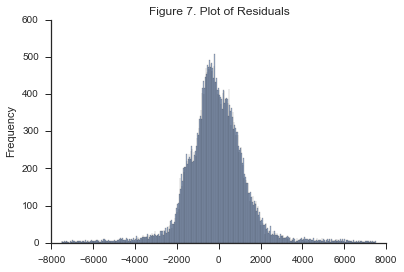

In [32]:
# Plotting Residuals from Linear Regression Model
intercept, params = results.params[0], results.params[1:]
predictions = intercept + np.dot(features, params)
plt.figure()
(df['ENTRIESn_hourly'] - predictions).plot(kind='hist',alpha=0.5, 
                                           bins=500, range=(-7500, 7500), title="Figure 7. Plot of Residuals")
sns.despine()

<class 'pandas.core.series.Series'>
<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
42649
42649


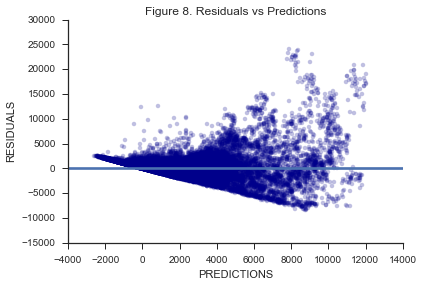

In [33]:
residuals = (df['ENTRIESn_hourly'] - predictions)
print type(residuals)
print type(results)
print len(residuals)
print len(predictions)
pred_res_df = pd.DataFrame(residuals)
pred_res_df['predictions'] = predictions 


ax = sns.regplot(x=predictions, y=residuals, data=pred_res_df, scatter_kws={"color":"darkblue","alpha":0.25,"s":20})
ax.axes.set_title('Figure 8. Residuals vs Predictions')
ax.set_xlabel("PREDICTIONS")
ax.set_ylabel("RESIDUALS")
sns.despine()

In [34]:
df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon,ENTRIESn_hourly_logtran
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177,-inf
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177,-inf
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177,-inf
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177,-inf
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177,-inf
